In [7]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy.io as io

# Plot

## Figure. 12

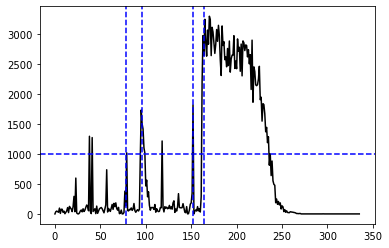

In [2]:
with open(r"data/case_am_statistics.obj", "rb") as input_file:
    sequential_statistics_topRsum = pickle.load(input_file)
plt.plot(sequential_statistics_topRsum,'k-')
plt.axvline(x=78, color='b', linestyle='--')
plt.axvline(x=96, color='b', linestyle='--')
plt.axvline(x=152, color='b', linestyle='--')
plt.axvline(x=164, color='b', linestyle='--')
plt.axhline(y=1000, color='b', linestyle='--')
# plt.savefig('figs/case_3d_s.eps')

## Figure 2

In [8]:
data = io.loadmat('data/temperature.mat')
X_org = data['mMov0']
X_org = np.rollaxis(X_org,2,0)

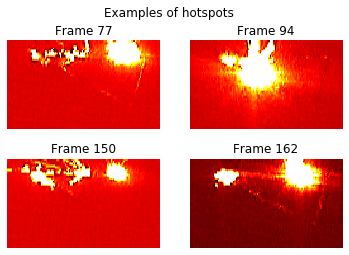

In [9]:
fig=plt.figure()
hotspots = [77, 94, 150, 162]
for i in range(1,5):
    ax=fig.add_subplot(2,2,i)        
    ax.imshow(X_org[hotspots[i-1]-1],cmap=plt.get_cmap('hot'))
    ax.set_title('Frame {}'.format(hotspots[i-1]))
    ax.axis('off')
fig.suptitle('Examples of hotspots') # or plt.suptitle('Main title')
# plt.savefig('figs/case_3d_example.eps')
plt.show()